\newpage

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

In [55]:
df = pd.read_csv("heart-disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Classification Problem

We will be using supervised machine learning to understand heart disease, predict it, and figure out the main causes of it.

## Dataset Exploration

In [56]:
df.shape

(303, 14)

In [57]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [58]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [59]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Based on our exploritary analysis, this dataset has 14 variables. There are 303 observations, and none of the variables have any N/A or missing values. All of the variables are 'int64' variables, except for 'oldpeak', which is a 'float64' variable.

Lets see the distribution of gender and age in this dataset.

In [60]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

Sex = 1 implies a male observation, whereas Sex = 0 implies a female. Clearly, this dataset has a lot more male than female observations.

Text(0.5, 1.0, 'Age Distribution of Dataset')

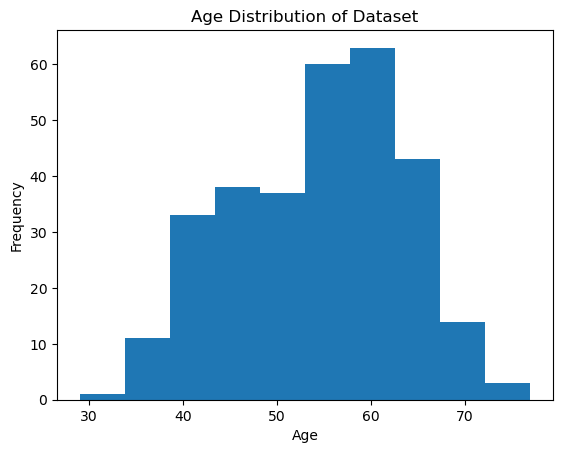

In [61]:
df.age.plot.hist()
plt.xlabel('Age')
plt.title("Age Distribution of Dataset")


In [62]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

The 'target' variable represents whether or not an individual has heart disease (target = 1 implies heart disease). Of all 303 people in this dataset, 165 have heart disease and 138 do not. 

Lets also have a look at the correlations between variables. We can use a correlation matrix.

In [63]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Data Splitting

Let's split are dataset into 2, one with the predictor/explanitory variables, and one with the response variable.

In [64]:
x = df.drop('target', axis=1)

In [65]:
y=df['target']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y)

## Supervised Classification

We will compare 3 supervised learning classifiers: Logistic Regression, KNN, Random Forest

In [67]:
Classifiers = {"Logistic Regression": LogisticRegression(),
               "KNN Classification": KNeighborsClassifier(),
               "Random Forest": RandomForestClassifier()
               }

### Accuracy Scores

In [68]:
def accuracy(classifier, X_train, X_test, Y_train, Y_test):

    accuracy_scores = {}

    for Classifier, Algorithm in Classifiers.items():
        fitting = Algorithm.fit(X_train, Y_train)
        prediction = fitting.predict(X_test)
        acc_score = metrics.accuracy_score(Y_test, prediction)
        
        accuracy_scores[Classifier] = acc_score

    return accuracy_scores



In [69]:
accuracy(Classifiers, x_train, x_test, y_train, y_test)

/opt/anaconda3/envs/Stats3DA3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN Classification': 0.6557377049180327,
 'Random Forest': 0.8032786885245902}

Based on accuracy score, Logistic Regression is a better choice for the classifier than both KNN and Random Forest.

### Confusion Matrices

/opt/anaconda3/envs/Stats3DA3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Logistic Regression Classification Confusion Matrix')

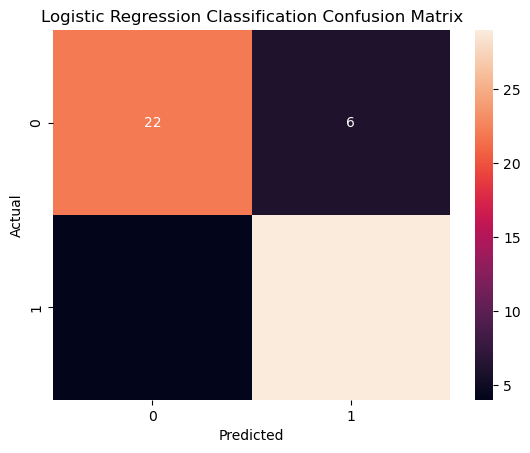

In [70]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
predicted_lr = lr.predict(x_test)

sns.heatmap(confusion_matrix(y_test, predicted_lr), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Logistic Regression Classification Confusion Matrix")

Text(0.5, 1.0, 'KNN Classification Confusion Matrix')

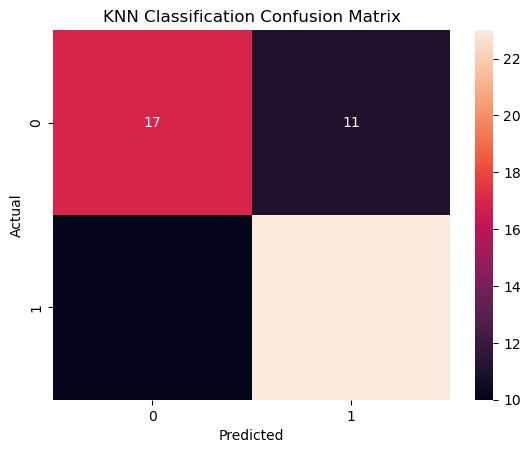

In [71]:
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
predicted_kNN = kNN.predict(x_test)

sns.heatmap(confusion_matrix(y_test, predicted_kNN), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("KNN Classification Confusion Matrix")

Text(0.5, 1.0, 'Random Forest Classification Confusion Matrix')

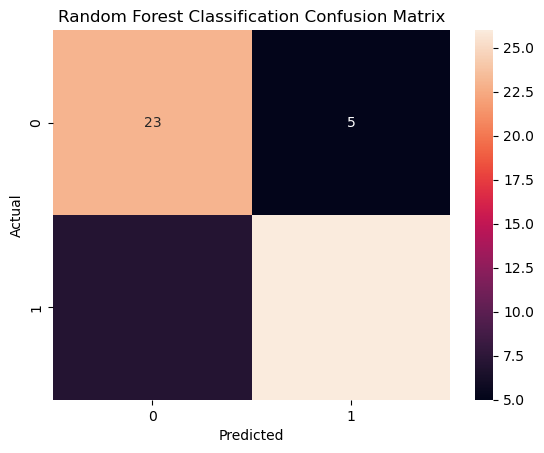

In [72]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predicted_rf = rf.predict(x_test)

sns.heatmap(confusion_matrix(y_test, predicted_rf), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Random Forest Classification Confusion Matrix")

For confusion matrices, we would look for high true (positive and negative) values. We would also look for low false (positive and negative values). In this case, the best options (based on confusion matrices) is Random Forest. Logistic Regression is also a good option.

When comparing Logistic Regression and Random Forest, we can conclude that Logistic Regression is slightly better in terms of accuracy score, and Random Forest is slightly better in terms of the confusion matrix. 

Let's use Random Forest as our supervised classifier.

## Feature Importance

In [73]:
rf_classifier = RandomForestClassifier(
    random_state=0
    ) 
rf_classifier.fit(x, y)

RandomForestClassifier(random_state=0)

In [74]:
feature_importances = rf_classifier.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
feature_names = x_train.columns[sorted_indices]
importances = feature_importances[sorted_indices]

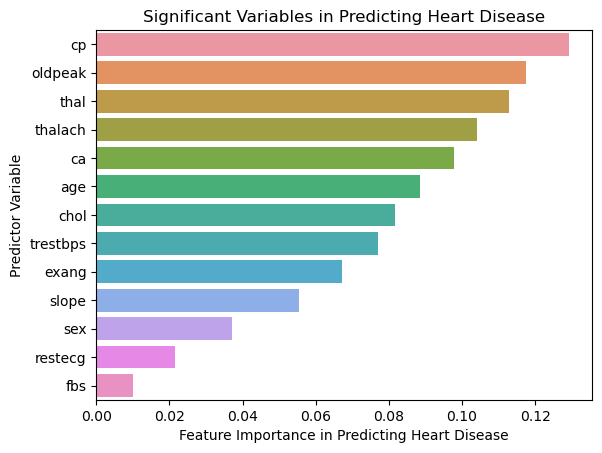

In [75]:
sns.barplot(x = importances, y = feature_names)
plt.ylabel("Predictor Variable")
plt.xlabel("Feature Importance in Predicting Heart Disease")
plt.title("Significant Variables in Predicting Heart Disease")
plt.show()

Using our Random Forest Classifier, we can conclude that the most important factors in predicting heart disease are Chest Pain (cp), ST Depression (oldpeak) and Maximum Heart Rate Achieved (thalach). Other important factors to mention are Age and Number of Major Vessels (ca).